QUESTION 2

In [1]:
# !pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
# import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc
from sklearn.pipeline import make_pipeline
data = pd.read_csv("Heart Disease.csv")
data.head()
data.describe()
# data.shape
data.info()
# data.dtypes
# data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [3]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64

In [4]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [4]:
data.columns
data['HeartDisease'].value_counts()

HeartDisease
0    3594
1     644
Name: count, dtype: int64

Training set size: (2966, 15)
Validation set size: (636, 15)
Test set size: (636, 15)


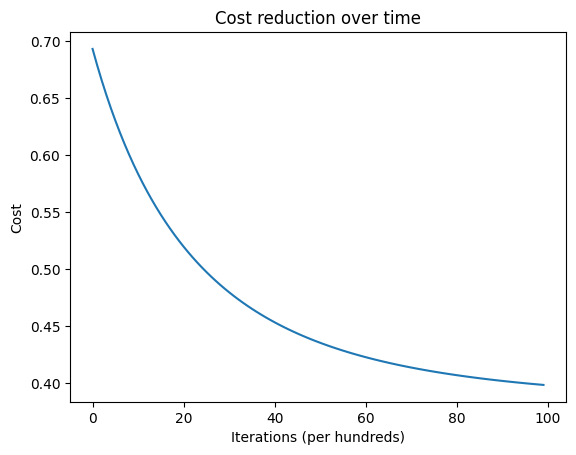

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters W (weights) and b (bias)
def initialize_parameters(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

# Compute cost and gradients for logistic regression
def compute_cost_and_gradient(X, y, W, b):
    m = X.shape[0]  # Number of samples
    A = sigmoid(np.dot(X, W) + b)  # Prediction using sigmoid
    cost = -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # Binary cross-entropy
    dW = (1/m) * np.dot(X.T, (A - y))  # Gradient w.r.t. weights
    db = (1/m) * np.sum(A - y)  # Gradient w.r.t. bias
    return cost, dW, db

# Train the model using gradient descent
#  there will be some change
def train(X_train, y_train, X_val, y_val, learning_rate, num_iterations):
    n_features = X_train.shape[1]
    W, b = initialize_parameters(n_features)
    costs = []
    
    y_train = y_train.reshape(-1, 1)
    
    for i in range(num_iterations):
        cost, dW, db = compute_cost_and_gradient(X_train, y_train, W, b)
        W -= learning_rate * dW  # Update weights
        b -= learning_rate * db  # Update bias
        
        if i % 100 == 0:  # Save cost every 100 iterations
            costs.append(cost)
    
    return W, b, costs

# Plot the cost over iterations
def plot_costs(costs):
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()

# Load dataset
# df = pd.read_csv('Heart Disease.csv')  # Replace with your actual file
df = data
# Handle missing values (fill or drop missing values)
df.fillna(df.mean(), inplace=True)  # Fill NA with column mean

# Handle missing values if any (for simplicity, we'll drop them)
# data = data.dropna()

# Split data into features and labels
X = df.drop(columns=['HeartDisease'])  # Drop the target column
y = df['HeartDisease'].values  # Target column as numpy array

# Split into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# Then split temp into validation and test (each 15% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
# learning_rate = 0.01
# num_iterations = 2000
learning_rate = 0.001
num_iterations = 10000
W, b, costs = train(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, num_iterations)

# Plot the costs
plot_costs(costs)


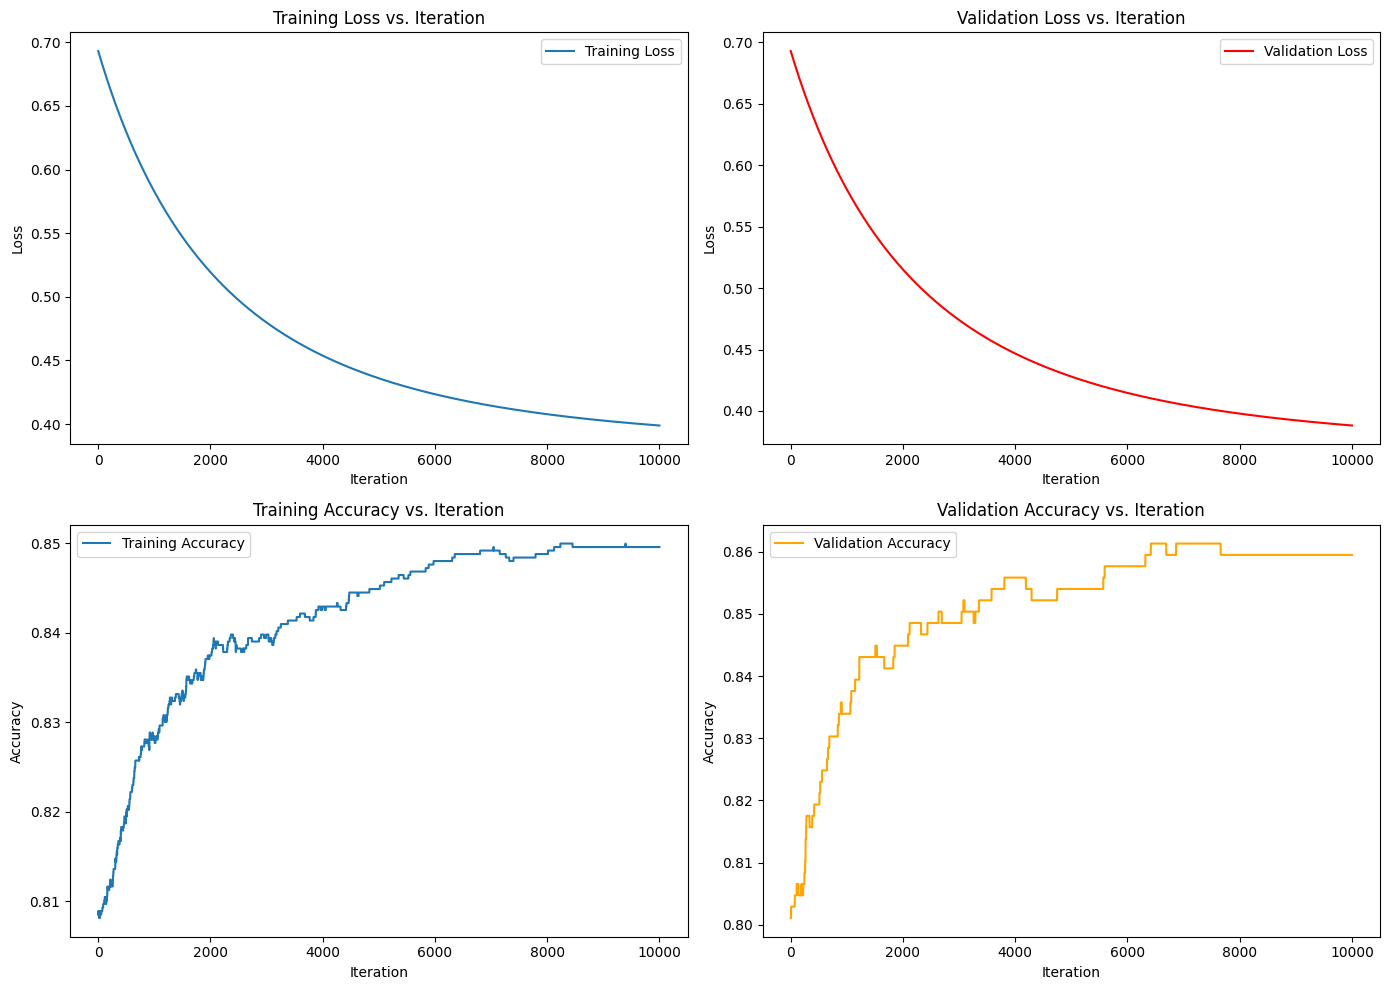

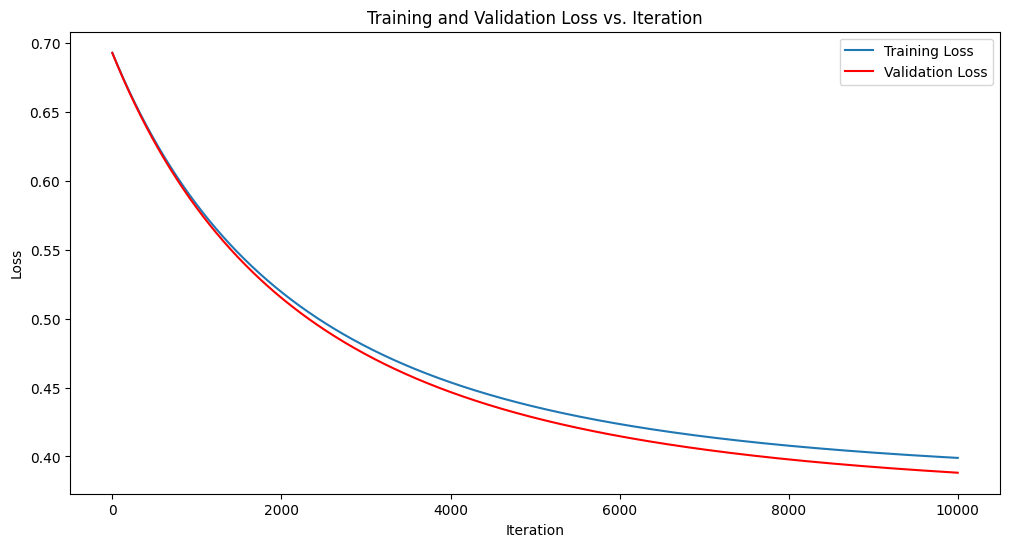

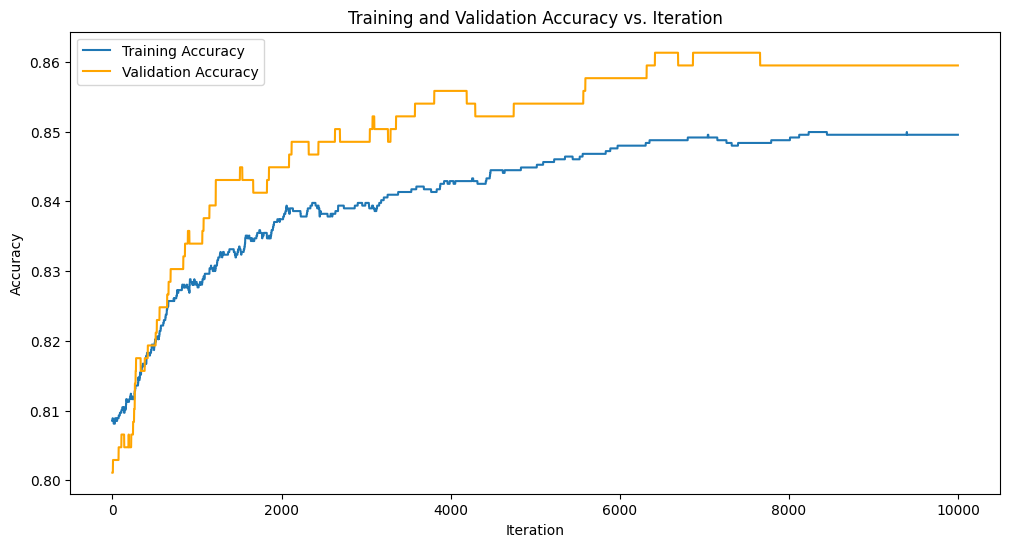

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data_scaled.shape[0])
split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_val = X_data_scaled[val_indices]
y_val = y_data[val_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.val_losses = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Validation loss and accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_loss = -np.mean(y_val * np.log(val_predictions + 1e-10) + (1 - y_val) * np.log(1 - val_predictions + 1e-10))
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Train the model
model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model.fit(X_train, y_train, X_val, y_val)

# Predict with the model
y_pred = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    # print(tp,tn,fp,fn)
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    # print(cm)
    # tn, fp, fn, tp = cm.ravel()
    tp, fn, fp, tn = cm.ravel()
    # print(tn,fp,fn,tp)
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Evaluate the model
accuracy_dt = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print("Classification Report:\n", report)
# print("Accuracy of Logistic Regression model: ", accuracy_dt)
# print("Confusion Matrix:\n", cm)

# Plotting the results
plt.figure(figsize=(14, 10))

# Plot Training Loss vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(model.losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()

# Plot Validation Loss vs. Iteration
plt.subplot(2, 2, 2)
plt.plot(model.val_losses, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.legend()

# Plot Training Accuracy vs. Iteration
plt.subplot(2, 2, 3)
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()

# Plot Validation Accuracy vs. Iteration
plt.subplot(2, 2, 4)
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Training Loss and Validation Loss vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(model.losses, label='Training Loss')
plt.plot(model.val_losses, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()
plt.show()
# Plot Training and Validation Accuracy vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load your data
# data = pd.read_csv('Heart Disease.csv')

# # Drop rows with missing values
# data = data.dropna()

# # Define independent variables (features) and dependent variable (target)
# X_data = data.drop('HeartDisease', axis=1).values
# y_data = data['HeartDisease'].values

# # Mean and standard deviation for scaling
# means = np.mean(X_data, axis=0)
# stds = np.std(X_data, axis=0)

# # Standardize features
# X_data_scaled = (X_data - means) / stds

# # Split data into training, validation, and test sets
# np.random.seed(42)
# indices = np.arange(X_data_scaled.shape[0])
# np.random.shuffle(indices)

# split_train = int(0.7 * X_data_scaled.shape[0])
# split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

# train_indices = indices[:split_train]
# val_indices = indices[split_train:split_val]
# test_indices = indices[split_val:]

# X_train = X_data_scaled[train_indices]
# y_train = y_data[train_indices]
# X_val = X_data_scaled[val_indices]
# y_val = y_data[val_indices]
# X_test = X_data_scaled[test_indices]
# y_test = y_data[test_indices]

# class LogisticRegression:
#     def __init__(self, learning_rate=0.001, num_iterations=10000):
#         self.learning_rate = learning_rate
#         self.num_iterations = num_iterations
    
#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
    
#     def fit(self, X, y, X_val, y_val):
#         m, n = X.shape
#         self.weights = np.zeros(n)
#         self.bias = 0
#         self.losses = []
#         self.train_accuracies = []
#         self.val_accuracies = []
#         self.val_losses = []

#         for i in range(self.num_iterations):
#             model = np.dot(X, self.weights) + self.bias
#             predictions = self.sigmoid(model)

#             # Compute gradients
#             dw = (1 / m) * np.dot(X.T, (predictions - y))
#             db = (1 / m) * np.sum(predictions - y)
            
#             # Update parameters
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db
            
#             # Calculate loss and accuracy
#             loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
#             self.losses.append(loss)
            
#             train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
#             train_accuracy = np.mean(np.round(train_predictions) == y)
#             self.train_accuracies.append(train_accuracy)
            
#             # Validation loss and accuracy
#             val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
#             val_loss = -np.mean(y_val * np.log(val_predictions + 1e-10) + (1 - y_val) * np.log(1 - val_predictions + 1e-10))
#             val_accuracy = np.mean(np.round(val_predictions) == y_val)
#             self.val_losses.append(val_loss)
#             self.val_accuracies.append(val_accuracy)
    
#     def predict(self, X):
#         model = np.dot(X, self.weights) + self.bias
#         predictions = self.sigmoid(model)
#         return np.round(predictions)

# # Train the model
# model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
# model.fit(X_train, y_train, X_val, y_val)

# # Predict with the model
# y_pred = model.predict(X_test)

# def accuracy(y_true, y_pred):
#     return np.mean(y_true == y_pred)

# def confusion_matrix(y_true, y_pred):
#     tp = np.sum((y_true == 1) & (y_pred == 1))
#     tn = np.sum((y_true == 0) & (y_pred == 0))
#     fp = np.sum((y_true == 0) & (y_pred == 1))
#     fn = np.sum((y_true == 1) & (y_pred == 0))
#     return np.array([[tn, fp], [fn, tp]])

# def classification_report(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     tn, fp, fn, tp = cm.ravel()
    
#     accuracy = (tp + tn) / (tp + tn + fp + fn)
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     return f"Accuracy: {accuracy:.4f}\n" \
#            f"Precision: {precision:.4f}\n" \
#            f"Recall: {recall:.4f}\n" \
#            f"F1 Score: {f1_score:.4f}\n"

# # Evaluate the model
# accuracy_dt = accuracy(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

# print("Classification Report:\n", report)
# print("Accuracy of Logistic Regression model: ", accuracy_dt)
# print("Confusion Matrix:\n", cm)

# # Plotting the results
# plt.figure(figsize=(14, 10))

# # Plot Training Loss vs. Iteration
# plt.subplot(2, 2, 1)
# plt.plot(model.losses, label='Training Loss')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training Loss vs. Iteration')
# plt.legend()

# # Plot Validation Loss vs. Iteration
# plt.subplot(2, 2, 2)
# plt.plot(model.val_losses, label='Validation Loss', color='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Validation Loss vs. Iteration')
# plt.legend()

# # Plot Training Accuracy vs. Iteration
# plt.subplot(2, 2, 3)
# plt.plot(model.train_accuracies, label='Training Accuracy')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy vs. Iteration')
# plt.legend()

# # Plot Validation Accuracy vs. Iteration
# plt.subplot(2, 2, 4)
# plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy vs. Iteration')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot Training and Validation Accuracy vs. Iteration
# plt.figure(figsize=(12, 6))
# plt.plot(model.train_accuracies, label='Training Accuracy')
# plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy vs. Iteration')
# plt.legend()
# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load your data
# data = pd.read_csv('Heart Disease.csv')

# # Drop rows with missing values
# data = data.dropna()

# # Define independent variables (features) and dependent variable (target)
# X_data = data.drop('HeartDisease', axis=1).values
# y_data = data['HeartDisease'].values

# # Mean and standard deviation for scaling
# means = np.mean(X_data, axis=0)
# stds = np.std(X_data, axis=0)

# # Standardize features
# X_data_scaled = (X_data - means) / stds

# # Split data into training, validation, and test sets
# np.random.seed(42)
# indices = np.arange(X_data_scaled.shape[0])
# np.random.shuffle(indices)

# split_train = int(0.7 * X_data_scaled.shape[0])
# split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

# train_indices = indices[:split_train]
# val_indices = indices[split_train:split_val]
# test_indices = indices[split_val:]

# X_train = X_data_scaled[train_indices]
# y_train = y_data[train_indices]
# X_val = X_data_scaled[val_indices]
# y_val = y_data[val_indices]
# X_test = X_data_scaled[test_indices]
# y_test = y_data[test_indices]

# print(f"Training set size: {X_train.shape[0]}")
# print(f"Validation set size: {X_val.shape[0]}")
# print(f"Test set size: {X_test.shape[0]}")

# class LogisticRegression:
#     def __init__(self, learning_rate=0.001, num_iterations=10000):
#         self.learning_rate = learning_rate
#         self.num_iterations = num_iterations
    
#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
    
#     def fit(self, X, y, X_val, y_val):
#         m, n = X.shape
#         self.weights = np.zeros(n)
#         self.bias = 0
#         self.losses = []
#         self.train_accuracies = []
#         self.val_accuracies = []
#         self.val_losses = []

#         for i in range(self.num_iterations):
#             model = np.dot(X, self.weights) + self.bias
#             predictions = self.sigmoid(model)

#             # Compute gradients
#             dw = (1 / m) * np.dot(X.T, (predictions - y))
#             db = (1 / m) * np.sum(predictions - y)
            
#             # Update parameters
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db
            
#             # Calculate loss and accuracy
#             loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
#             self.losses.append(loss)
            
#             train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
#             train_accuracy = np.mean(np.round(train_predictions) == y)
#             self.train_accuracies.append(train_accuracy)
            
#             # Validation loss and accuracy
#             val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
#             val_loss = -np.mean(y_val * np.log(val_predictions + 1e-10) + (1 - y_val) * np.log(1 - val_predictions + 1e-10))
#             val_accuracy = np.mean(np.round(val_predictions) == y_val)
#             self.val_losses.append(val_loss)
#             self.val_accuracies.append(val_accuracy)
    
#     def predict(self, X):
#         model = np.dot(X, self.weights) + self.bias
#         predictions = self.sigmoid(model)
#         return np.round(predictions)

# # Train the model
# model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
# model.fit(X_train, y_train, X_val, y_val)

# # Predict with the model
# y_pred = model.predict(X_test)

# def accuracy(y_true, y_pred):
#     return np.mean(y_true == y_pred)

# def confusion_matrix(y_true, y_pred):
#     tp = np.sum((y_true == 1) & (y_pred == 1))
#     tn = np.sum((y_true == 0) & (y_pred == 0))
#     fp = np.sum((y_true == 0) & (y_pred == 1))
#     fn = np.sum((y_true == 1) & (y_pred == 0))
#     return np.array([[tn, fp], [fn, tp]])

# def classification_report(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     tn, fp, fn, tp = cm.ravel()
    
#     accuracy = (tp + tn) / (tp + tn + fp + fn)
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     return f"Accuracy: {accuracy:.4f}\n" \
#            f"Precision: {precision:.4f}\n" \
#            f"Recall: {recall:.4f}\n" \
#            f"F1 Score: {f1_score:.4f}\n"

# # Evaluate the model
# accuracy_dt = accuracy(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)


# print("Classification Report:\n", report)
# print("Accuracy of Logistic Regression model: ", accuracy_dt)
# print("Confusion Matrix:\n", cm)

# # Plotting the results
# plt.figure(figsize=(14, 10))

# # Plot Training Loss vs. Iteration
# plt.subplot(2, 2, 1)
# plt.plot(model.losses, label='Training Loss')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training Loss vs. Iteration')
# plt.legend()

# # Plot Validation Loss vs. Iteration
# plt.subplot(2, 2, 2)
# plt.plot(model.val_losses, label='Validation Loss', color='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Validation Loss vs. Iteration')
# plt.legend()

# # Plot Training Accuracy vs. Iteration
# plt.subplot(2, 2, 3)
# plt.plot(model.train_accuracies, label='Training Accuracy')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy vs. Iteration')
# plt.legend()

# # Plot Validation Accuracy vs. Iteration
# plt.subplot(2, 2, 4)
# plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy vs. Iteration')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot Training Loss and Validation Loss vs. Iteration
# plt.figure(figsize=(12, 6))
# plt.plot(model.losses, label='Training Loss')
# plt.plot(model.val_losses, label='Validation Loss', color='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss vs. Iteration')
# plt.legend()
# plt.show()


In [19]:
print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)

Classification Report:
 Accuracy: 0.8634
Precision: 0.8766
Recall: 0.9812
F1 Score: 0.9260

Accuracy of Logistic Regression model:  0.8633879781420765
Confusion Matrix:
 [[469   9]
 [ 66   5]]


Validation Classification Report:
 Accuracy: 0.8595
Precision: 0.8750
Recall: 0.0843
F1 Score: 0.1538

Validation Accuracy:  0.8594890510948905
Validation Confusion Matrix:
 [[464   1]
 [ 76   7]]
ROC-AUC Score:  0.7423241352506802


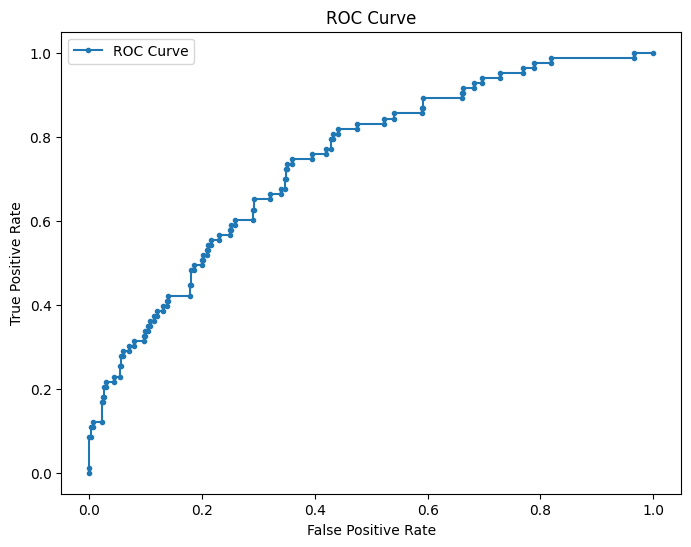

In [21]:
from sklearn.metrics import roc_auc_score

# # Predict on the validation set
# val_predictions = model.predict(X_val)

# # Calculate confusion matrix for the validation set
# def confusion_matrix(y_true, y_pred):
#     tp = np.sum((y_true == 1) & (y_pred == 1))
#     tn = np.sum((y_true == 0) & (y_pred == 0))
#     fp = np.sum((y_true == 0) & (y_pred == 1))
#     fn = np.sum((y_true == 1) & (y_pred == 0))
#     return np.array([[tn, fp], [fn, tp]])

# def classification_report(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     tn, fp, fn, tp = cm.ravel()
    
#     accuracy = (tp + tn) / (tp + tn + fp + fn)
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     return f"Accuracy: {accuracy:.4f}\n" \
#            f"Precision: {precision:.4f}\n" \
#            f"Recall: {recall:.4f}\n" \
#            f"F1 Score: {f1_score:.4f}\n"

# Evaluate model on validation set
val_accuracy = accuracy(y_val, val_predictions)
val_report = classification_report(y_val, val_predictions)
val_conf_matrix = confusion_matrix(y_val, val_predictions)
roc_auc = roc_auc_score(y_val, model.sigmoid(np.dot(X_val, model.weights) + model.bias))

print("Validation Classification Report:\n", val_report)
print("Validation Accuracy: ", val_accuracy)
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("ROC-AUC Score: ", roc_auc)

# Plot ROC Curve
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val, model.sigmoid(np.dot(X_val, model.weights) + model.bias))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Confusion Matrix:
The confusion matrix is computed to show the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) counts. It helps visualize the performance of the classification model.
Classification Metrics:
Precision: The proportion of true positives among all positive predictions. It shows how many of the predicted positives are actually positive.
Recall: The proportion of true positives among all actual positives. It shows how many of the actual positives were correctly identified.
F1 Score: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
ROC-AUC Score: The Area Under the Receiver Operating Characteristic Curve. It measures the model’s ability to distinguish between positive and negative classes. A higher score indicates better performance.
Insights:
Precision and recall provide insight into the trade-off between correctly identifying positive cases and avoiding false positives.
F1 Score helps evaluate the model’s balance between precision and recall, especially important in cases of imbalanced datasets.
ROC-AUC Score offers a summary of the model’s performance across different thresholds and is useful for comparing different models.


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_29772\1248030158.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


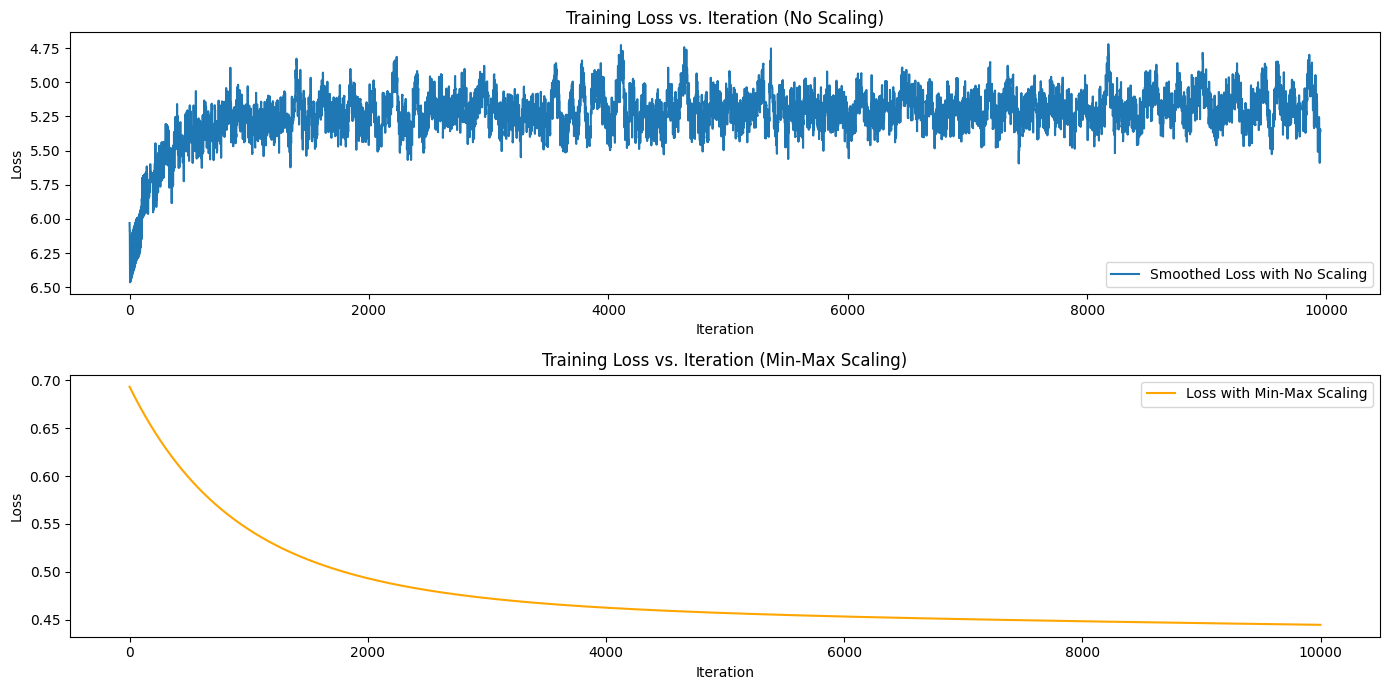

: 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data.shape[0])
split_val = int(0.15 * X_data.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data[train_indices]
y_train = y_data[train_indices]
X_val = X_data[val_indices]
y_val = y_data[val_indices]
X_test = X_data[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X_train, y_train, X_val, y_val):
        m_train, n = X_train.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.num_iterations):
            model_train = np.dot(X_train, self.weights) + self.bias
            predictions_train = self.sigmoid(model_train)

            # Compute gradients
            dw = (1 / m_train) * np.dot(X_train.T, (predictions_train - y_train))
            db = (1 / m_train) * np.sum(predictions_train - y_train)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y_train * np.log(predictions_train + 1e-10) + (1 - y_train) * np.log(1 - predictions_train + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X_train, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y_train)
            self.train_accuracies.append(train_accuracy)
            
            # Validation accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

import numpy as np
import matplotlib.pyplot as plt

def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_results(losses_no_scaling, losses_min_max_scaling, window_size=50):
    plt.figure(figsize=(14, 7))
    
    # Smooth the losses_no_scaling data
    smoothed_losses_no_scaling = smooth_data(losses_no_scaling, window_size)
    
    plt.subplot(2, 1, 1)
    plt.plot(smoothed_losses_no_scaling, label='Smoothed Loss with No Scaling')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (No Scaling)')
    plt.gca().invert_yaxis()
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(losses_min_max_scaling, label='Loss with Min-Max Scaling', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (Min-Max Scaling)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Logistic Regression with No Scaling
model_no_scaling = LogisticRegression(learning_rate=0.01, num_iterations=10000)
model_no_scaling.fit(X_train, y_train, X_val, y_val)

# Logistic Regression with Min-Max Scaling
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_val_minmax = scaler.transform(X_val)
X_test_minmax = scaler.transform(X_test)

model_minmax_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_minmax_scaling.fit(X_train_minmax, y_train, X_val_minmax, y_val)

# Plotting the results
plot_results(model_no_scaling.losses, model_minmax_scaling.losses)


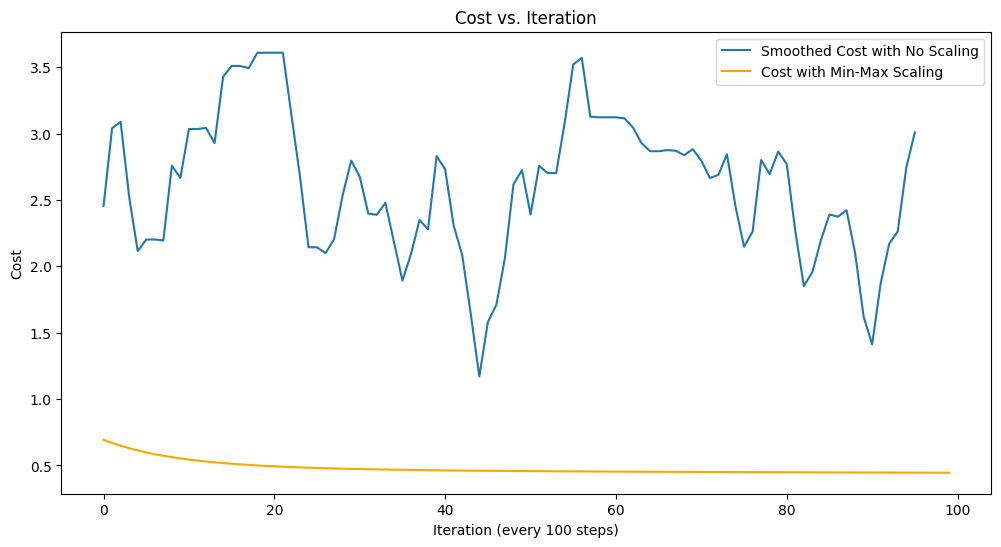

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data.shape[0])
split_val = int(0.15 * X_data.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data[train_indices]
y_train = y_data[train_indices]
X_val = X_data[val_indices]
y_val = y_data[val_indices]
X_test = X_data[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.costs = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute cost
            cost = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            
            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store cost value every 100 iterations
            if i % 100 == 0:
                self.costs.append(cost)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_costs(costs_no_scaling, costs_min_max_scaling, window_size=5):
    plt.figure(figsize=(12, 6))
    
    # Smooth the costs_no_scaling data
    smoothed_costs_no_scaling = smooth_data(costs_no_scaling, window_size)
    
    # Adjust the x-axis for the smoothed data
    x_axis = np.arange(len(smoothed_costs_no_scaling))
    
    plt.plot(x_axis, smoothed_costs_no_scaling, label='Smoothed Cost with No Scaling')
    plt.plot(costs_min_max_scaling, label='Cost with Min-Max Scaling', color='orange')
    plt.xlabel('Iteration (every 100 steps)')
    plt.ylabel('Cost')
    plt.title('Cost vs. Iteration')
    plt.legend()
    plt.show()

# Logistic Regression with No Scaling
model_no_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_no_scaling.fit(X_train, y_train)

# Logistic Regression with Min-Max Scaling
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_val_minmax = scaler.transform(X_val)
X_test_minmax = scaler.transform(X_test)

model_minmax_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_minmax_scaling.fit(X_train_minmax, y_train)

# Plotting the results
plot_costs(model_no_scaling.costs, model_minmax_scaling.costs)


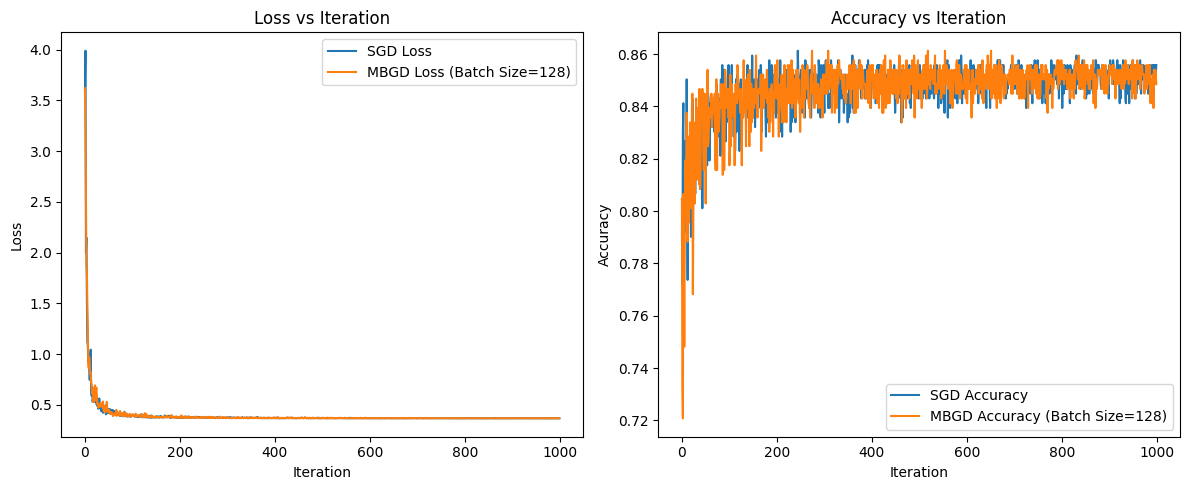

Confusion Matrix for SGD:
 [[458   4]
 [ 75  11]]
Confusion Matrix for MBGD:
 [[454   8]
 [ 75  11]]
Classification Report for SGD:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       462
           1       0.73      0.13      0.22        86

    accuracy                           0.86       548
   macro avg       0.80      0.56      0.57       548
weighted avg       0.84      0.86      0.81       548

Accuracy of SGD model:  0.8558394160583942
Classification Report for MBGD:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       462
           1       0.58      0.13      0.21        86

    accuracy                           0.85       548
   macro avg       0.72      0.56      0.56       548
weighted avg       0.81      0.85      0.81       548

Accuracy of MBGD model:  0.8485401459854015


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Load your data
data = pd.read_csv('Heart Disease.csv')
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, test, and validation sets (70:15:15)
X_train_temp, X_test_val, y_train_temp, y_test_val = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_temp)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Convert y_train and y_test to numpy arrays for indexing
y_train_np = y_train_temp.values
y_test_np = y_test.values

# Function to train and record loss and accuracy for each iteration
def train_and_plot(optimizer, X_train, y_train, X_test, y_test, batch_size=None):
    n_iter = 1000
    losses = []
    accuracies = []

    n_samples = X_train.shape[0]
    
    for epoch in range(n_iter):
        if batch_size is None:
            # Use full-batch gradient descent
            optimizer.partial_fit(X_train, y_train, classes=np.unique(y_train))
        else:
            # Use mini-batch gradient descent
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for start_idx in range(0, n_samples, batch_size):
                end_idx = min(start_idx + batch_size, n_samples)
                batch_indices = indices[start_idx:end_idx]
                X_batch, y_batch = X_train[batch_indices], y_train_np[batch_indices]
                optimizer.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
        
        y_train_pred = optimizer.predict(X_train)
        y_test_pred = optimizer.predict(X_test)

        # Log loss for training data
        loss = log_loss(y_train, optimizer.predict_proba(X_train))
        losses.append(loss)

        # Accuracy for test data
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracies.append(accuracy)

    return losses, accuracies

# Initialize models
sgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, warm_start=True)
mbgd_model = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1, warm_start=True)

# Train and capture loss/accuracy for Stochastic Gradient Descent (batch size=None)
sgd_losses, sgd_accuracies = train_and_plot(sgd_model, X_train_scaled, y_train_np, X_test_scaled, y_test)

# Train and capture loss/accuracy for Mini-Batch Gradient Descent (batch size=32)
mbgd_losses, mbgd_accuracies = train_and_plot(mbgd_model, X_train_scaled, y_train_np, X_test_scaled, y_test, batch_size=128)

# Plot Loss vs Iteration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sgd_losses, label="SGD Loss")
plt.plot(mbgd_losses, label="MBGD Loss (Batch Size=128)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.legend()

# Plot Accuracy vs Iteration
plt.subplot(1, 2, 2)
plt.plot(sgd_accuracies, label="SGD Accuracy")
plt.plot(mbgd_accuracies, label="MBGD Accuracy (Batch Size=128)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration")
plt.legend()

plt.tight_layout()
plt.show()




# Evaluate models
sgd_pred = sgd_model.predict(X_test_scaled)
mbgd_pred = mbgd_model.predict(X_test_scaled)
# Predict using both models
y_pred_sgd = sgd_model.predict(X_test_scaled)
y_pred_mbgd = mbgd_model.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
cm_mbgd = confusion_matrix(y_test, y_pred_mbgd)

print("Confusion Matrix for SGD:\n", cm_sgd)
print("Confusion Matrix for MBGD:\n", cm_mbgd)

print("Classification Report for SGD:\n", classification_report(y_test, sgd_pred))
print("Accuracy of SGD model: ", accuracy_score(y_test, sgd_pred))

print("Classification Report for MBGD:\n", classification_report(y_test, mbgd_pred))
print("Accuracy of MBGD model: ", accuracy_score(y_test, mbgd_pred))


Comparison and Interpretation
True Positives (TP):

SGD: 11
MBGD: 9
Interpretation: SGD identifies 2 more positive cases (Class 1) correctly compared to MBGD.
True Negatives (TN):

SGD: 458
MBGD: 456
Interpretation: SGD correctly predicts 2 more negative cases (Class 0) than MBGD.
False Positives (FP):

SGD: 4
MBGD: 6
Interpretation: SGD has fewer false positives, meaning it is less likely to incorrectly classify Class 0 as Class 1.
False Negatives (FN):

SGD: 75
MBGD: 77
Interpretation: SGD has 2 fewer false negatives, meaning it is better at capturing positive cases (Class 1) compared to MBGD.
Conclusion
Overall Accuracy: Both models have similar overall accuracy, but SGD has slightly better performance in terms of correctly identifying both classes.
Class 0 (Majority Class): Both models are very similar in predicting Class 0, with only a small difference in false positives and true negatives.
Class 1 (Minority Class): SGD performs slightly better in predicting Class 1 with fewer false negatives and a higher number of true positives compared to MBGD.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Create a pipeline to scale features and train the model
scaler = StandardScaler()
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle class imbalance with class weights
pipeline = make_pipeline(scaler, lr_model)

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform k-fold cross-validation manually
for fold_idx, (train_indices, test_indices) in enumerate(kf.split(X_data)):
    # Split the data into training and test sets for this fold
    X_train_fold, X_test_fold = X_data.iloc[train_indices], X_data.iloc[test_indices]
    y_train_fold, y_test_fold = y_data.iloc[train_indices], y_data.iloc[test_indices]
    
    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict on the test set
    y_pred_fold = pipeline.predict(X_test_fold)
    
    # Calculate metrics
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    precision_fold = precision_score(y_test_fold, y_pred_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold)
    
    # Append metrics
    accuracies.append(accuracy_fold)
    precisions.append(precision_fold)
    recalls.append(recall_fold)
    f1_scores.append(f1_fold)
    
    # Print metrics for each fold
    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy: {accuracy_fold:.4f}")
    print(f"  Precision: {precision_fold:.4f}")
    print(f"  Recall: {recall_fold:.4f}")
    print(f"  F1 Score: {f1_fold:.4f}")
    print()

# Calculate and print average and standard deviation of metrics across folds
accuracy_mean = sum(accuracies) / len(accuracies)
accuracy_std = pd.Series(accuracies).std()

precision_mean = sum(precisions) / len(precisions)
precision_std = pd.Series(precisions).std()

recall_mean = sum(recalls) / len(recalls)
recall_std = pd.Series(recalls).std()

f1_mean = sum(f1_scores) / len(f1_scores)
f1_std = pd.Series(f1_scores).std()

print("Cross-Validation Results (k=5):")
print(f"Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f}")
print(f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f}")
print(f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f}")
print(f"F1 Score: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

# # Discuss stability and variance
# print("\nDiscussion:")
# print("Stability and variance of the model's performance across different folds can be assessed based on the standard deviation of the metrics.")
# print("A lower standard deviation indicates more consistent performance across folds, while a higher standard deviation suggests more variability.")
# print("In this case, analyzing the standard deviations of accuracy, precision, recall, and F1 score can help understand how robust and stable the model is.")


Fold 1:
  Accuracy: 0.6694
  Precision: 0.2810
  Recall: 0.6311
  F1 Score: 0.3889

Fold 2:
  Accuracy: 0.6744
  Precision: 0.2601
  Recall: 0.6636
  F1 Score: 0.3737

Fold 3:
  Accuracy: 0.6512
  Precision: 0.2626
  Recall: 0.6842
  F1 Score: 0.3796

Fold 4:
  Accuracy: 0.7045
  Precision: 0.2946
  Recall: 0.6909
  F1 Score: 0.4130

Fold 5:
  Accuracy: 0.6662
  Precision: 0.2464
  Recall: 0.6538
  F1 Score: 0.3579

Cross-Validation Results (k=5):
Accuracy: Mean = 0.6731, Std = 0.0196
Precision: Mean = 0.2689, Std = 0.0189
Recall: Mean = 0.6647, Std = 0.0240
F1 Score: Mean = 0.3826, Std = 0.0204

Discussion:
Stability and variance of the model's performance across different folds can be assessed based on the standard deviation of the metrics.
A lower standard deviation indicates more consistent performance across folds, while a higher standard deviation suggests more variability.
In this case, analyzing the standard deviations of accuracy, precision, recall, and F1 score can help under

In [17]:
from collections import Counter

# Print class distribution for each fold
for fold_idx, (train_indices, test_indices) in enumerate(kf.split(X_data)):
    print(f"Fold {fold_idx + 1} class distribution:")
    print("Train set:", Counter(y_data.iloc[train_indices]))
    print("Test set:", Counter(y_data.iloc[test_indices]))
    print()

# Print class distribution for the single test split
print("Single test split class distribution:")
print("Train set:", Counter(y_train))
print("Test set:", Counter(y_test))


Fold 1 class distribution:
Train set: Counter({0: 2489, 1: 435})
Test set: Counter({0: 610, 1: 122})

Fold 2 class distribution:
Train set: Counter({0: 2475, 1: 450})
Test set: Counter({0: 624, 1: 107})

Fold 3 class distribution:
Train set: Counter({0: 2482, 1: 443})
Test set: Counter({0: 617, 1: 114})

Fold 4 class distribution:
Train set: Counter({0: 2478, 1: 447})
Test set: Counter({0: 621, 1: 110})

Fold 5 class distribution:
Train set: Counter({0: 2472, 1: 453})
Test set: Counter({0: 627, 1: 104})

Single test split class distribution:
Train set: Counter({0: 2176, 1: 383})
Test set: Counter({0: 923, 1: 174})



Training with learning_rate=0.001, penalty=l1, alpha=0.0001
Early stopping at epoch 720 with validation loss -0.8558


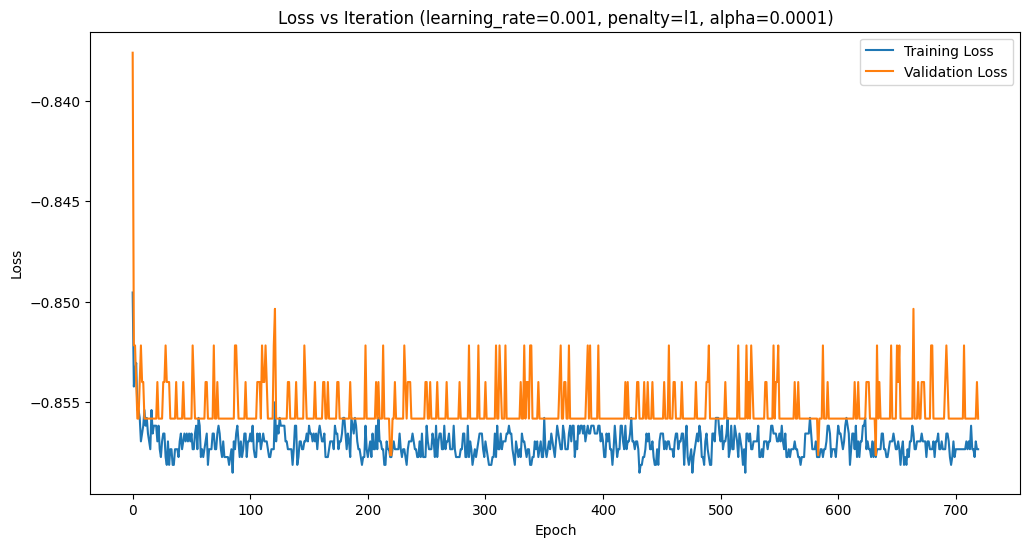

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.46      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.65      0.53      0.51       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[454   7]
 [ 82   6]]

Training with learning_rate=0.001, penalty=l1, alpha=0.001
Early stopping at epoch 503 with validation loss -0.8558


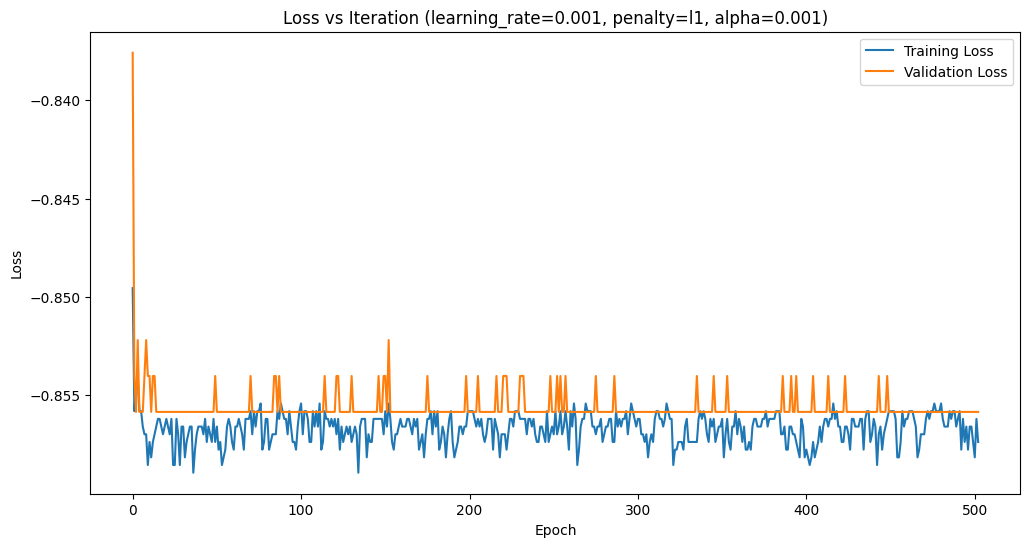

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.55      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.70      0.53      0.52       549
weighted avg       0.80      0.84      0.79       549

Accuracy of Model:  0.8415300546448088
Confusion Matrix:
 [[456   5]
 [ 82   6]]

Training with learning_rate=0.001, penalty=l2, alpha=0.0001
Early stopping at epoch 506 with validation loss -0.8540


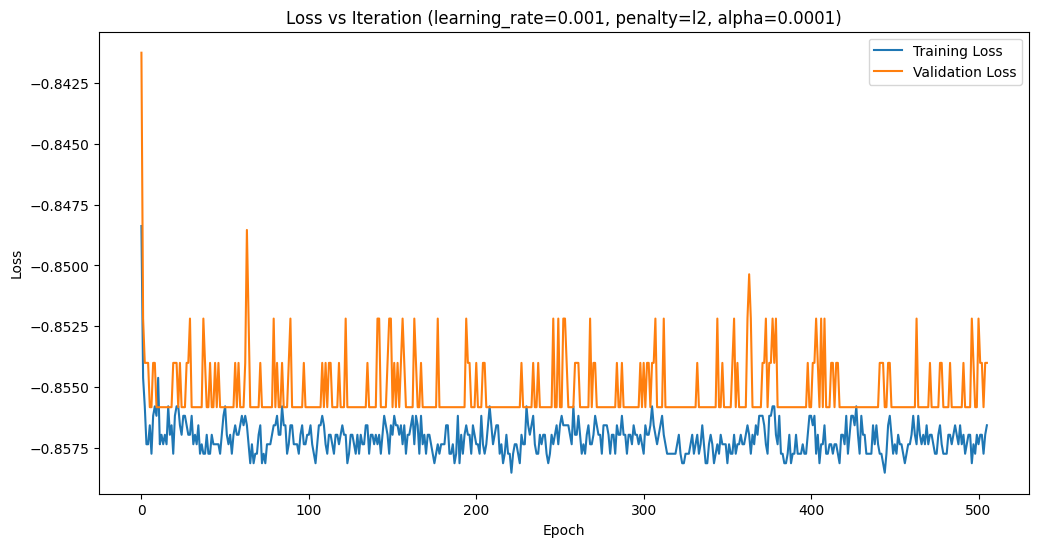

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.46      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.65      0.53      0.51       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[454   7]
 [ 82   6]]

Training with learning_rate=0.001, penalty=l2, alpha=0.001
Early stopping at epoch 520 with validation loss -0.8558


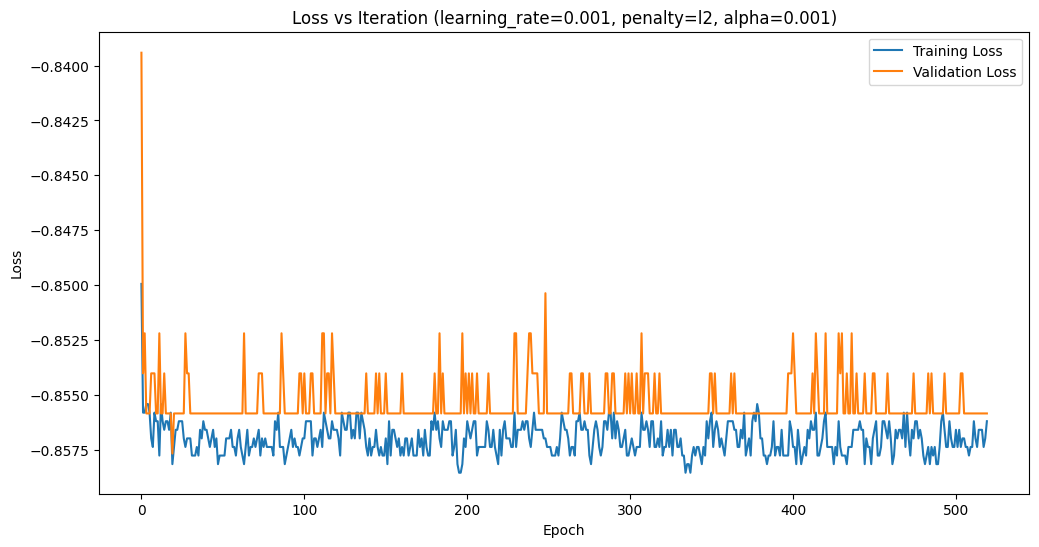

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       461
           1       0.50      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.67      0.53      0.52       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8397085610200364
Confusion Matrix:
 [[455   6]
 [ 82   6]]

Training with learning_rate=0.01, penalty=l1, alpha=0.0001
Early stopping at epoch 513 with validation loss -0.8449


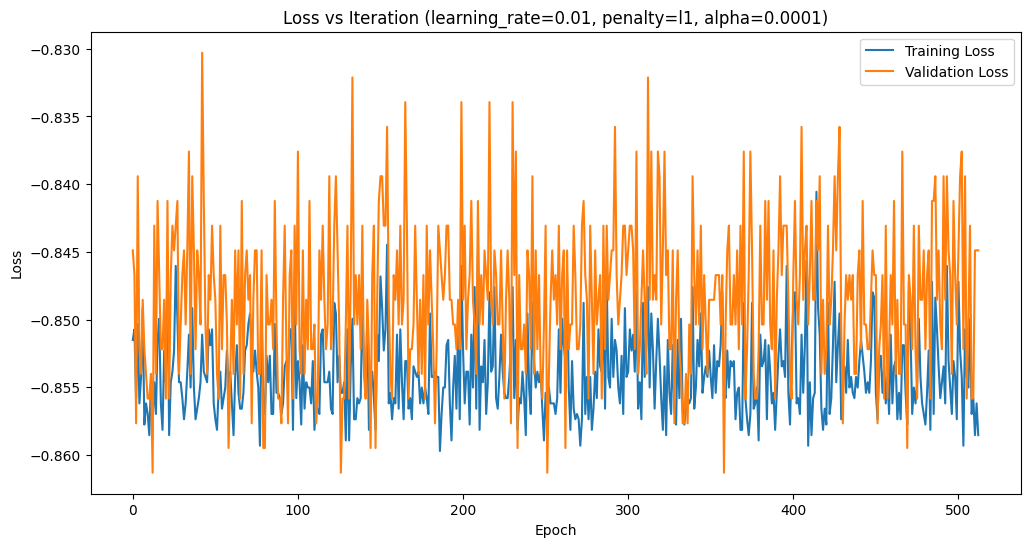

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.46      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.65      0.53      0.51       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[454   7]
 [ 82   6]]

Training with learning_rate=0.01, penalty=l1, alpha=0.001
Early stopping at epoch 535 with validation loss -0.8376


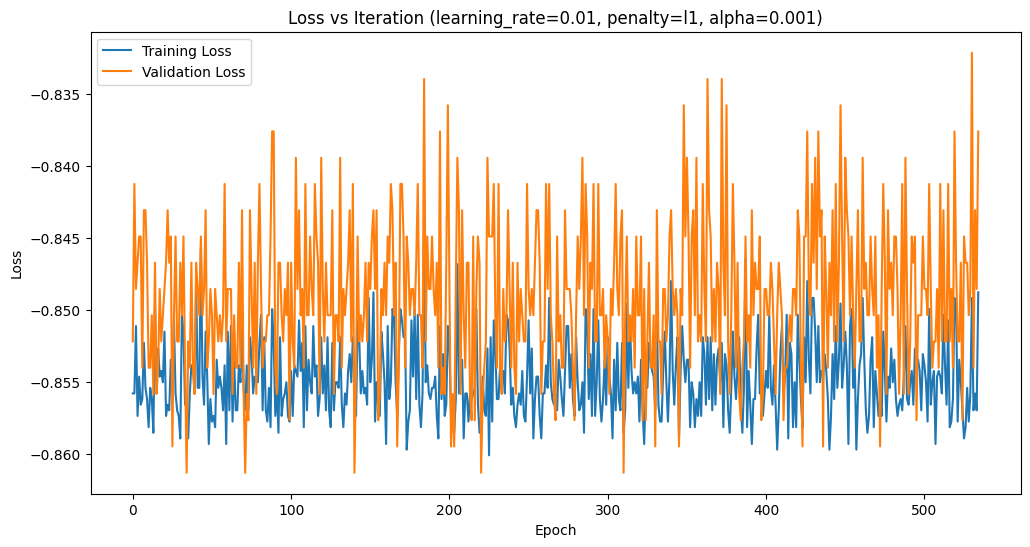

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       461
           1       0.17      0.03      0.06        88

    accuracy                           0.82       549
   macro avg       0.50      0.50      0.48       549
weighted avg       0.73      0.82      0.76       549

Accuracy of Model:  0.8178506375227687
Confusion Matrix:
 [[446  15]
 [ 85   3]]

Training with learning_rate=0.01, penalty=l2, alpha=0.0001
Early stopping at epoch 754 with validation loss -0.8504


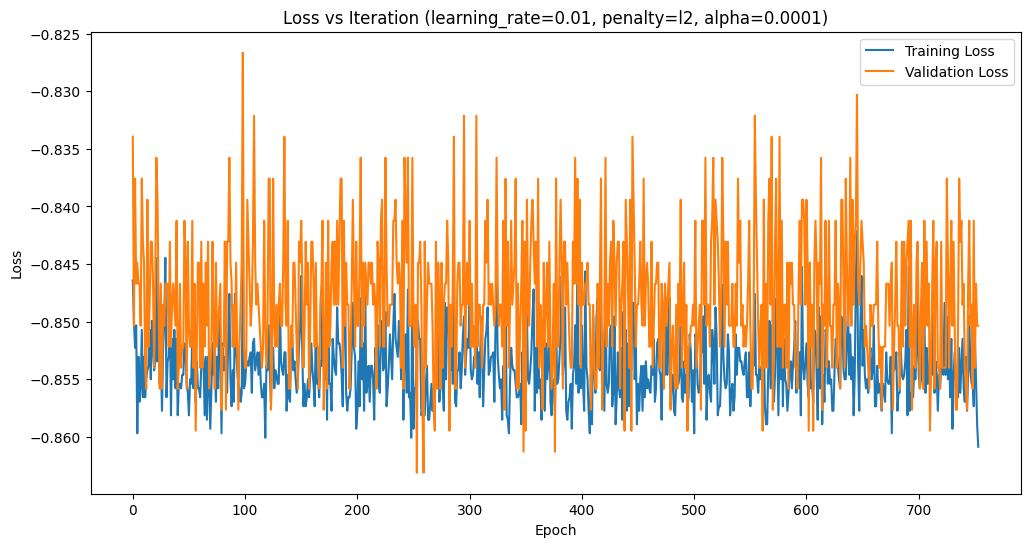

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.46      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.65      0.53      0.51       549
weighted avg       0.79      0.84      0.78       549

Accuracy of Model:  0.8378870673952641
Confusion Matrix:
 [[454   7]
 [ 82   6]]

Training with learning_rate=0.01, penalty=l2, alpha=0.001
Early stopping at epoch 1123 with validation loss -0.8577


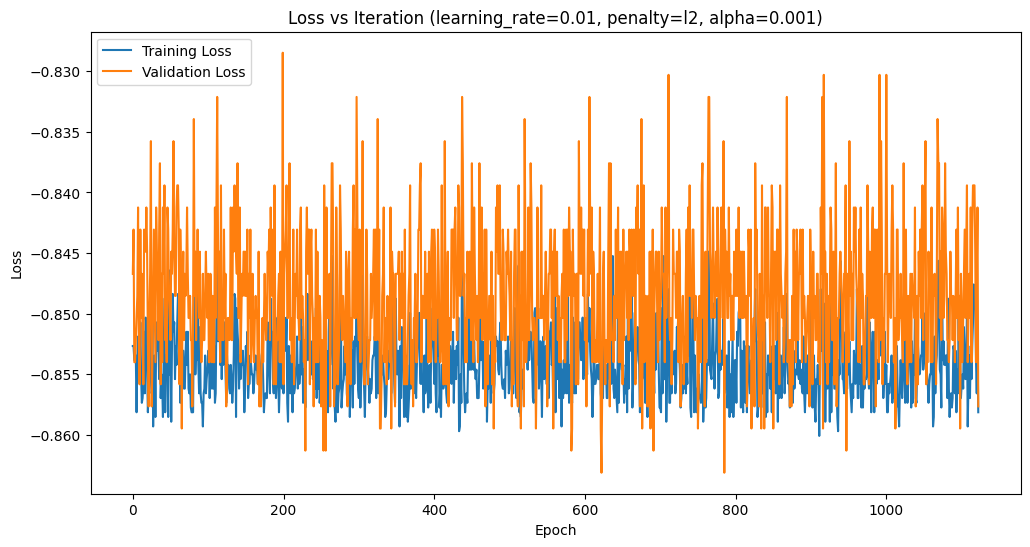

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       461
           1       0.33      0.03      0.06        88

    accuracy                           0.83       549
   macro avg       0.59      0.51      0.49       549
weighted avg       0.76      0.83      0.77       549

Accuracy of Model:  0.8342440801457195
Confusion Matrix:
 [[455   6]
 [ 85   3]]

Training with learning_rate=0.1, penalty=l1, alpha=0.0001
Early stopping at epoch 697 with validation loss -0.8339


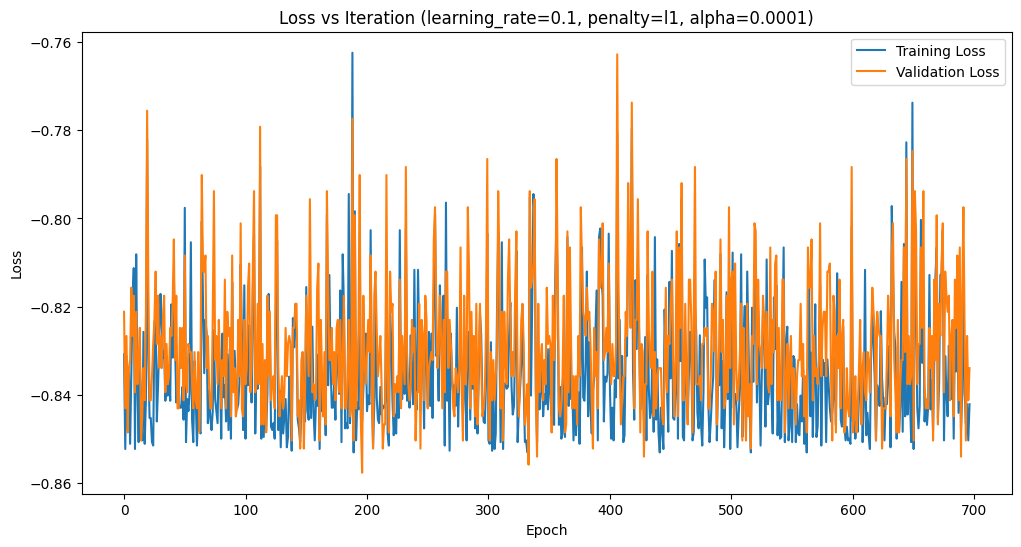

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90       461
           1       0.32      0.14      0.19        88

    accuracy                           0.81       549
   macro avg       0.58      0.54      0.54       549
weighted avg       0.77      0.81      0.78       549

Accuracy of Model:  0.8142076502732241
Confusion Matrix:
 [[435  26]
 [ 76  12]]

Training with learning_rate=0.1, penalty=l1, alpha=0.001
Early stopping at epoch 773 with validation loss -0.8358


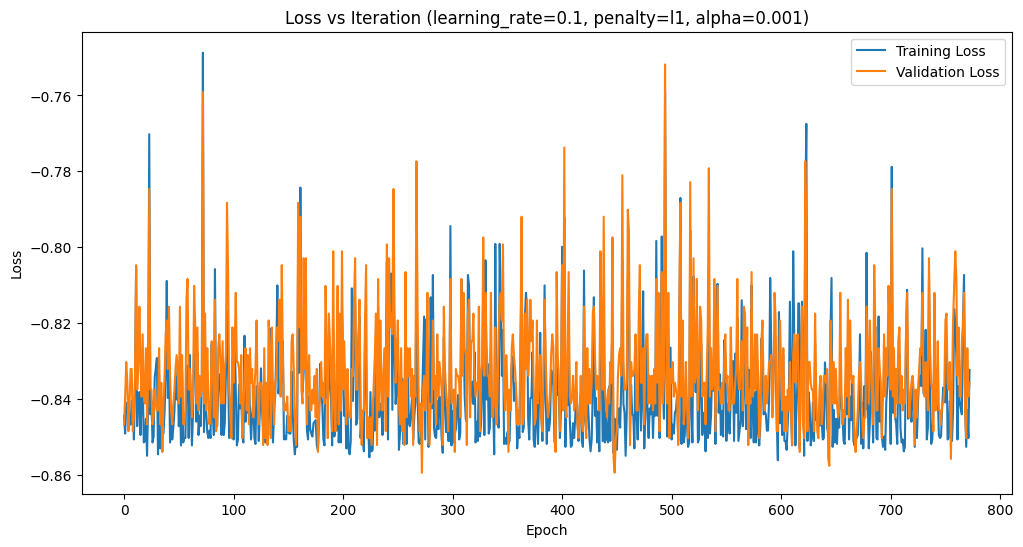

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       461
           1       0.23      0.11      0.15        88

    accuracy                           0.80       549
   macro avg       0.54      0.52      0.52       549
weighted avg       0.75      0.80      0.77       549

Accuracy of Model:  0.7978142076502732
Confusion Matrix:
 [[428  33]
 [ 78  10]]

Training with learning_rate=0.1, penalty=l2, alpha=0.0001
Early stopping at epoch 833 with validation loss -0.8431


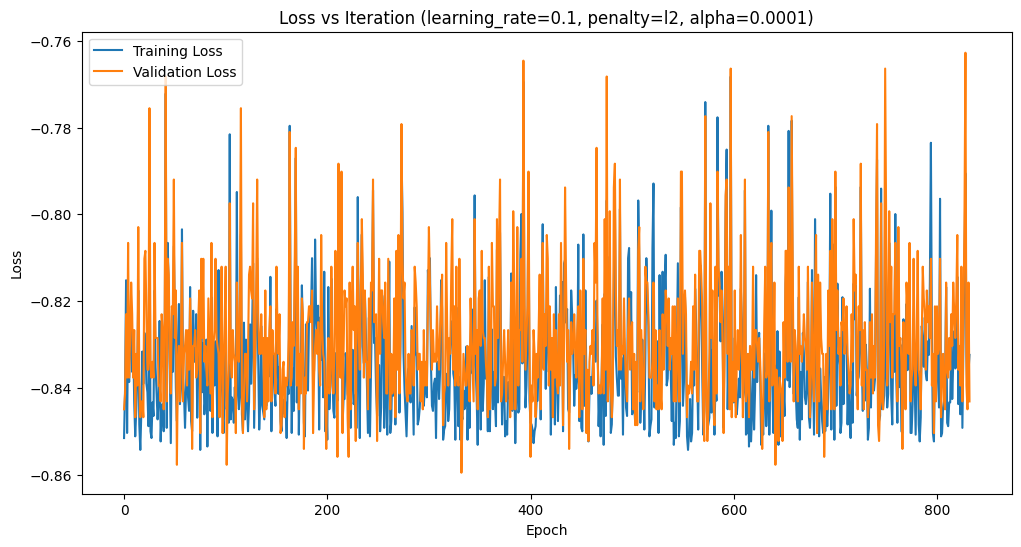

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       461
           1       0.25      0.11      0.16        88

    accuracy                           0.80       549
   macro avg       0.55      0.52      0.52       549
weighted avg       0.75      0.80      0.77       549

Accuracy of Model:  0.8032786885245902
Confusion Matrix:
 [[431  30]
 [ 78  10]]

Training with learning_rate=0.1, penalty=l2, alpha=0.001
Early stopping at epoch 1174 with validation loss -0.7737


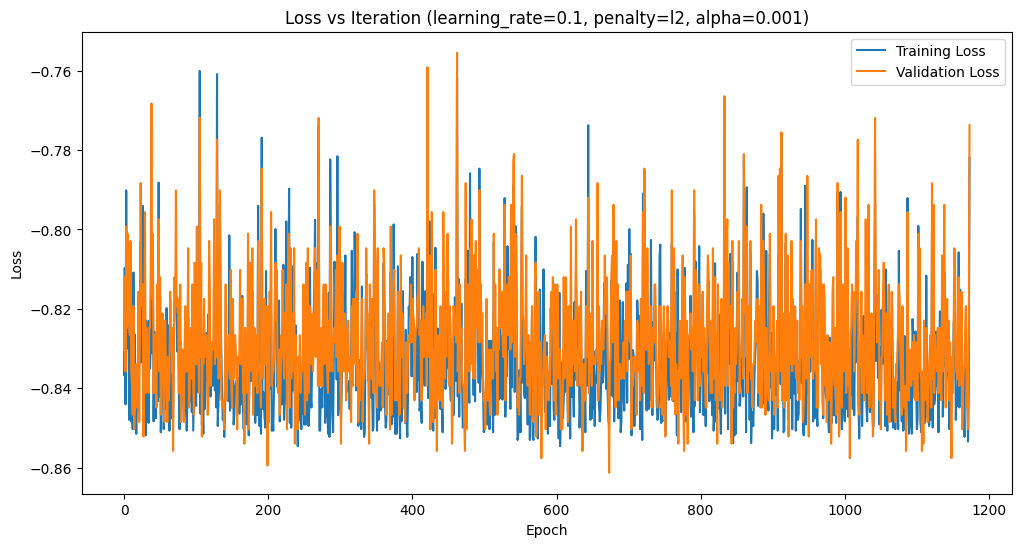

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       461
           1       0.31      0.41      0.35        88

    accuracy                           0.76       549
   macro avg       0.59      0.62      0.60       549
weighted avg       0.79      0.76      0.77       549

Accuracy of Model:  0.7577413479052824
Confusion Matrix:
 [[380  81]
 [ 52  36]]

Training without early stopping:
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       461
           1       0.43      0.07      0.12        88

    accuracy                           0.84       549
   macro avg       0.64      0.53      0.51       549
weighted avg       0.78      0.84      0.78       549

Accuracy of Model:  0.8360655737704918
Confusion Matrix:
 [[453   8]
 [ 82   6]]


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train SGDClassifier with early stopping
def train_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, penalty, alpha, max_iter, patience):
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, penalty=penalty, alpha=alpha, max_iter=1, warm_start=True)
    train_losses = []
    val_losses = []
    
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(max_iter):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Compute training and validation losses
        train_loss = -model.score(X_train, y_train)
        val_loss = -model.score(X_val, y_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Check early stopping criteria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1} with validation loss {val_loss:.4f}")
                break
    
    return model, train_losses, val_losses

# Function to plot results
def plot_losses(train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Experiment with different learning rates and regularization techniques
learning_rates = [0.001, 0.01, 0.1]
penalties = ['l1', 'l2']
alphas = [0.0001, 0.001]
max_iter = 10000  # Set a high enough max_iter for early stopping to have effect
patience = 500  # Number of epochs with no improvement to wait before stopping

for learning_rate in learning_rates:
    for penalty in penalties:
        for alpha in alphas:
            print(f"\nTraining with learning_rate={learning_rate}, penalty={penalty}, alpha={alpha}")
            
            # Train with early stopping
            model, train_losses, val_losses = train_with_early_stopping(
                X_train_scaled, y_train, X_val_scaled, y_val,
                learning_rate=learning_rate, penalty=penalty, alpha=alpha, max_iter=max_iter, patience=patience
            )
            
            # Plot Loss vs Iteration
            plot_losses(train_losses, val_losses, f'Loss vs Iteration (learning_rate={learning_rate}, penalty={penalty}, alpha={alpha})')
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test_scaled)
            print("Classification Report:\n", classification_report(y_test, y_pred))
            print("Accuracy of Model: ", accuracy_score(y_test, y_pred))
            print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Train without early stopping for comparison
model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, penalty='l2', alpha=0.001, max_iter=5000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("\nTraining without early stopping:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy of Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


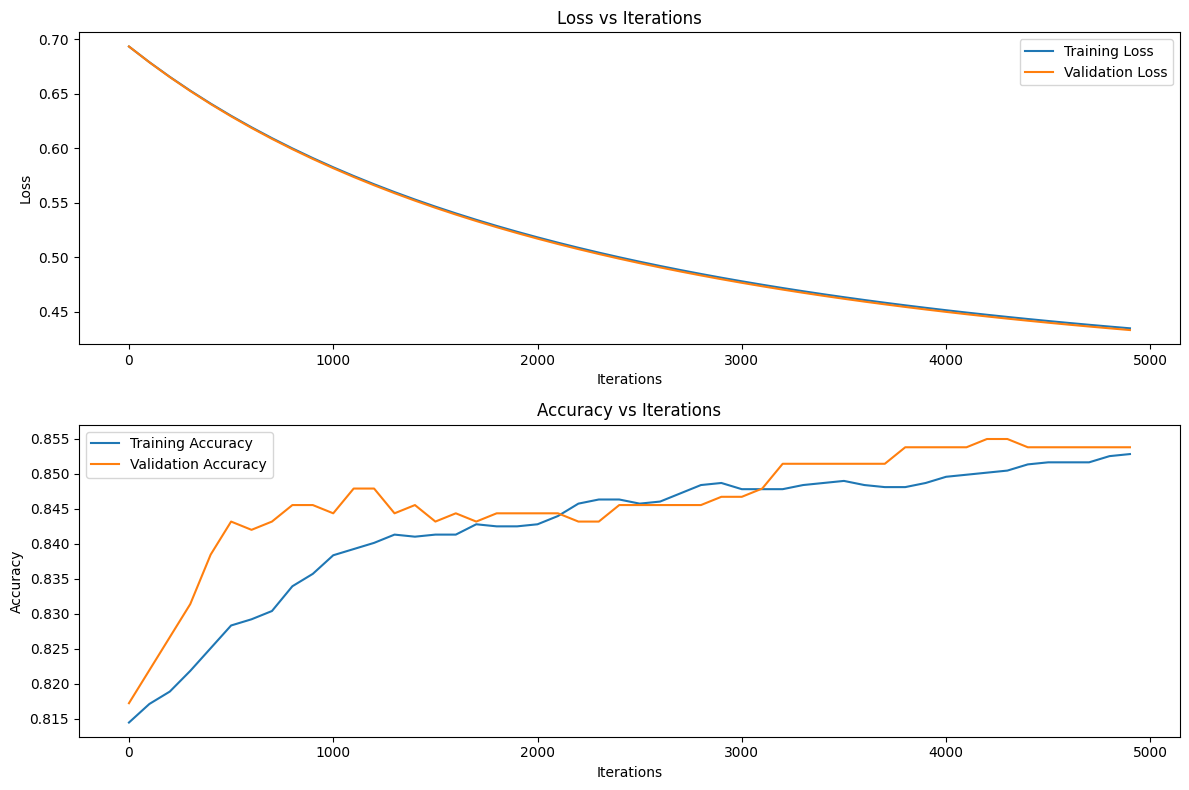

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters W (weights) and b (bias)
def initialize_parameters(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

# Compute cost and gradients for logistic regression
def compute_cost_and_gradient(X, y, W, b):
    m = X.shape[0]  # Number of samples
    A = sigmoid(np.dot(X, W) + b)  # Prediction using sigmoid
    cost = -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # Binary cross-entropy
    dW = (1/m) * np.dot(X.T, (A - y))  # Gradient w.r.t. weights
    db = (1/m) * np.sum(A - y)  # Gradient w.r.t. bias
    return cost, dW, db

# Prediction function
def predict(X, W, b):
    A = sigmoid(np.dot(X, W) + b)
    return np.where(A > 0.5, 1, 0)

# Compute accuracy
def compute_accuracy(X, y, W, b):
    y_pred = predict(X, W, b)
    return np.mean(y_pred == y)

# Train the model using gradient descent
def train(X_train, y_train, X_val, y_val, learning_rate, num_iterations):
    n_features = X_train.shape[1]
    W, b = initialize_parameters(n_features)
    costs_train = []
    costs_val = []
    accuracies_train = []
    accuracies_val = []
    
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    
    for i in range(num_iterations):
        cost_train, dW, db = compute_cost_and_gradient(X_train, y_train, W, b)
        cost_val, _, _ = compute_cost_and_gradient(X_val, y_val, W, b)
        
        W -= learning_rate * dW  # Update weights
        b -= learning_rate * db  # Update bias
        
        if i % 100 == 0:
            costs_train.append(cost_train)
            costs_val.append(cost_val)
            accuracies_train.append(compute_accuracy(X_train, y_train, W, b))
            accuracies_val.append(compute_accuracy(X_val, y_val, W, b))
    
    return W, b, costs_train, costs_val, accuracies_train, accuracies_val

# Plot the metrics over iterations
def plot_metrics(costs_train, costs_val, accuracies_train, accuracies_val):
    iterations = range(0, len(costs_train) * 100, 100)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(iterations, costs_train, label='Training Loss')
    plt.plot(iterations, costs_val, label='Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.title('Loss vs Iterations')
    
    plt.subplot(2, 1, 2)
    plt.plot(iterations, accuracies_train, label='Training Accuracy')
    plt.plot(iterations, accuracies_val, label='Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.title('Accuracy vs Iterations')
    
    plt.tight_layout()
    plt.show()

# Load dataset
df = pd.read_csv('Heart Disease.csv')  # Replace with your actual file

# Handle missing values (fill or drop missing values)
df.fillna(df.mean(), inplace=True)  # Fill NA with column mean

# Split data into features and labels
X = df.drop(columns=['HeartDisease'])  # Drop the target column
y = df['HeartDisease'].values  # Target column as numpy array

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
learning_rate = 0.001
num_iterations = 5000
W, b, costs_train, costs_val, accuracies_train, accuracies_val = train(
    X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, num_iterations)

# Plot the metrics
plot_metrics(costs_train, costs_val, accuracies_train, accuracies_val)


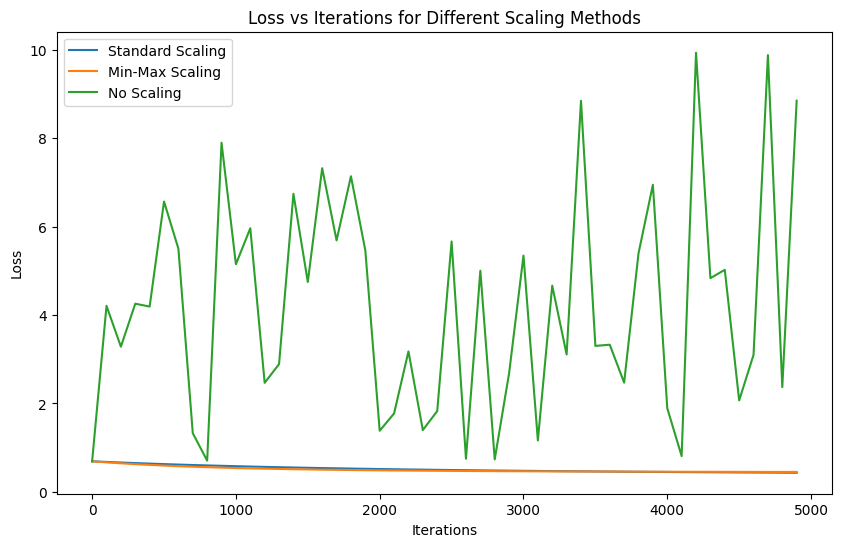

In [22]:
# Feature scaling (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_val_minmax = scaler_minmax.transform(X_val)

# Train the model with Min-Max Scaling
W_minmax, b_minmax, costs_train_minmax, costs_val_minmax, accuracies_train_minmax, accuracies_val_minmax = train(
    X_train_minmax, y_train, X_val_minmax, y_val, learning_rate, num_iterations)

# Train the model without any scaling
W_noscale, b_noscale, costs_train_noscale, costs_val_noscale, accuracies_train_noscale, accuracies_val_noscale = train(
    X_train, y_train, X_val, y_val, learning_rate, num_iterations)

# Updated Plotting function with corrected iterations handling
def plot_loss_comparison(costs_standard, costs_minmax, costs_noscale):
    # Determine the minimum length of cost arrays
    min_length = min(len(costs_standard), len(costs_minmax), len(costs_noscale))
    
    # Limit the iterations to the smallest cost array length
    iterations = range(0, min_length * 100, 100)
    
    # Adjust each cost array to match the minimum length
    costs_standard = costs_standard[:min_length]
    costs_minmax = costs_minmax[:min_length]
    costs_noscale = costs_noscale[:min_length]
    
    plt.figure(figsize=(10, 6))
    
    # Plot the losses for each scaling method
    plt.plot(iterations, costs_standard, label='Standard Scaling')
    plt.plot(iterations, costs_minmax, label='Min-Max Scaling')
    plt.plot(iterations, costs_noscale, label='No Scaling')
    
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend()
    plt.title('Loss vs Iterations for Different Scaling Methods')
    plt.show()

# Call the updated plot function
plot_loss_comparison(costs_train, costs_train_minmax, costs_train_noscale)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp, fn, fp, tn = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1_score

def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc, prec, rec, f1 = classification_report(y_test, y_pred)
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)
    
    return {
        'accuracy_mean': np.mean(accuracies),
        'accuracy_std': np.std(accuracies),
        'precision_mean': np.mean(precisions),
        'precision_std': np.std(precisions),
        'recall_mean': np.mean(recalls),
        'recall_std': np.std(recalls),
        'f1_score_mean': np.mean(f1_scores),
        'f1_score_std': np.std(f1_scores)
    }

# Perform k-fold cross-validation
cv_results = k_fold_cross_validation(X_data_scaled, y_data, k=5)

print(f"Average Accuracy: {cv_results['accuracy_mean']:.4f} ± {cv_results['accuracy_std']:.4f}")
print(f"Average Precision: {cv_results['precision_mean']:.4f} ± {cv_results['precision_std']:.4f}")
print(f"Average Recall: {cv_results['recall_mean']:.4f} ± {cv_results['recall_std']:.4f}")
print(f"Average F1 Score: {cv_results['f1_score_mean']:.4f} ± {cv_results['f1_score_std']:.4f}")


Average Accuracy: 0.8498 ± 0.0085
Average Precision: 0.8544 ± 0.0090
Average Recall: 0.9919 ± 0.0032
Average F1 Score: 0.9180 ± 0.0050


Stability and Variance:
Stability: The low standard deviations for accuracy, precision, recall, and F1 score indicate that your model's performance is quite stable across different folds of the data. This suggests that the model generalizes well and isn't overly sensitive to the specific training data it sees.

Variance: The low variance in the performance metrics indicates that the model's ability to make predictions is consistent across different subsets of the data. This is generally a good sign, as it implies the model isn't overfitting or underfitting to particular folds of the data.